In [1]:
#import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

In [4]:
# Load imputed datasets
df = pd.read_csv("https://raw.githubusercontent.com/drmayu7/303A_machinelearning/main/Dataset/processed/breast-cancer-wisconsin-imputed.csv")

In [5]:
# Remove the sample_id column
df = df.drop(columns=['sample_id'])

# Split the dataset into features/variables (X) and labels/outcome (y)
X = df.drop(columns=['class'])
y = df['class']

In [6]:
# Scale the features - Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split the data into training and testing sets using sklearn module
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Run supervised learning - Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Make predictions on the test dataset
y_pred = model.predict(X_test)

In [10]:
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[94  1]
 [ 4 41]]


C:\Users\A\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


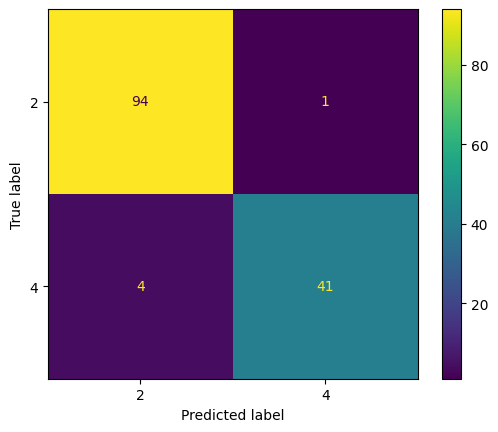

In [11]:
# Visualize the confusion matrix using a heatmap
plot_confusion_matrix(model, X_test, y_test)

In [12]:
# Calculate the accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9642857142857143


In [13]:
# Calculate the f1-score
f1 = f1_score(y_test, y_pred, pos_label=2)
print("F1_score:", f1)

F1_score: 0.9740932642487047


In [14]:
# Combine the true labels and predicted labels into a dataframe
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [15]:
df2

,Actual,Predicted
158,2,2
499,2,2
396,2,2
155,4,4
321,2,2
...,...,...
24,2,2
218,4,4
431,2,2
281,2,2
